In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import os
import tensorflow as tf
import sys
import seaborn as sns
import scipy
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import minmax_scale
from tensorflow import keras
import random

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_row', 100)

from keras import backend as K
K.clear_session()
tf.compat.v1.reset_default_graph()

In [2]:
Full_Data = np.load('./Data/Full_Data.npy')
Cal_Full_Data = np.load('./Data/Cal_Full_Data.npy')

print('Full_Data_shape : ', Full_Data.shape, 'Cal_Full_Data_Shape : ', Cal_Full_Data.shape)

Full_Data_shape :  (1042, 11) Cal_Full_Data_Shape :  (1042, 11)


In [3]:
Total_Data_vital = []
Total_Data_Gender = []
Total_Data_Label = []

for i, value1 in enumerate(Full_Data):
    Total_Data_vital.append(value1[:-2])
    Total_Data_Gender.append(value1[-2])
    Total_Data_Label.append(value1[-1])

Total_Data_vital = np.array(Total_Data_vital)
Total_Data_Label = np.array(Total_Data_Label)
Total_Data_Gender = np.array(Total_Data_Gender)

print('vital : ', Total_Data_vital.shape, 'Label : ', Total_Data_Label.shape, 'Gender : ', Total_Data_Gender.shape)

vital :  (1042, 9) Label :  (1042,) Gender :  (1042,)


In [76]:
np.save('C:/jupyter/Human_Deep/Human_Deep/Data/Total_Data_Gender_Test', Total_Data_Gender)
np.save('C:/jupyter/Human_Deep/Human_Deep/Data/Total_Data_Label_Test', Total_Data_Label)

In [4]:
Total_Data_mean = []
Total_Data_std = []

HR_Data = []
HR_Data1 = []
HR_Data2 = []

O2sat_Data = []
O2sat_Data1 = []
O2sat_Data2 = []

Temp_Data = []
Temp_Data1 = []
Temp_Data2 = []

SBP_Data = []
SBP_Data1 = []
SBP_Data2 = []

Resp_Data = []
Resp_Data1 = []
Resp_Data2 = []

Creatinine_Data = []
Creatinine_Data1 = []
Creatinine_Data2 = []

WBC_Data = []
WBC_Data1 = []
WBC_Data2 = []

Platelets_Data = []
Platelets_Data1 = []
Platelets_Data2 = []

Age_Data = []
Age_Data1 = []
Age_Data2 = []


for i, value1 in enumerate(Total_Data_vital):
        HR_Data.append(value1[0])
        O2sat_Data.append(value1[1])
        Temp_Data.append(value1[2])
        SBP_Data.append(value1[3])
        Resp_Data.append(value1[4])
        Creatinine_Data.append(value1[5])
        WBC_Data.append(value1[6])
        Platelets_Data.append(value1[7])
        Age_Data.append(value1[8])
        
    
HR_Data1 = np.mean(HR_Data)
O2sat_Data1 = np.mean(O2sat_Data)
Temp_Data1 = np.mean(Temp_Data)
SBP_Data1 = np.mean(SBP_Data)
Resp_Data1 = np.mean(Resp_Data)
Creatinine_Data1 = np.mean(Creatinine_Data)
WBC_Data1 = np.mean(WBC_Data)
Platelets_Data1 = np.mean(Platelets_Data)
Age_Data1 = np.mean(Age_Data)



Total_Data_mean.append(HR_Data1)
Total_Data_mean.append(O2sat_Data1)
Total_Data_mean.append(Temp_Data1)
Total_Data_mean.append(SBP_Data1)
Total_Data_mean.append(Resp_Data1)
Total_Data_mean.append(Creatinine_Data1)
Total_Data_mean.append(WBC_Data1)
Total_Data_mean.append(Platelets_Data1)
Total_Data_mean.append(Age_Data1)

Total_Data_mean = np.array(Total_Data_mean)




HR_Data2 = np.std(HR_Data)
O2sat_Data2 = np.std(O2sat_Data)
Temp_Data2 = np.std(Temp_Data)
SBP_Data2 = np.std(SBP_Data)
Resp_Data2 = np.std(Resp_Data)
Creatinine_Data2 = np.std(Creatinine_Data)
WBC_Data2 = np.std(WBC_Data)
Platelets_Data2 = np.std(Platelets_Data)
Age_Data2 = np.std(Age_Data)


Total_Data_std.append(HR_Data2)
Total_Data_std.append(O2sat_Data2)
Total_Data_std.append(Temp_Data2)
Total_Data_std.append(SBP_Data2)
Total_Data_std.append(Resp_Data2)
Total_Data_std.append(Creatinine_Data2)
Total_Data_std.append(WBC_Data2)
Total_Data_std.append(Platelets_Data2)
Total_Data_std.append(Age_Data2)

Total_Data_std = np.array(Total_Data_std)


print('Total_Data_mean : ', Total_Data_mean)
print('Total_Data_std : ', Total_Data_std)
print('------------------------------------------------------------')
print('Total_Data_mean_shape : ', Total_Data_mean.shape)
print('Total_Data_std_shape : ', Total_Data_std.shape)

Total_Data_mean :  [ 89.17466411  97.18714012  37.00973129 120.47336852  19.03742802
   1.54616123  12.6253071  182.86708253  62.50790787]
Total_Data_std :  [ 18.06036506   3.21345654   1.00267786  22.69960404   5.64742355
   1.80593855   9.75624779 101.42122895  15.52611008]
------------------------------------------------------------
Total_Data_mean_shape :  (9,)
Total_Data_std_shape :  (9,)


In [78]:
np.save('C:/jupyter/Human_Deep/Human_Deep/Data/Total_Data_std_Test', Total_Data_std)
np.save('C:/jupyter/Human_Deep/Human_Deep/Data/Total_Data_mean_Test', Total_Data_mean)

In [5]:
print('Total_Gender : ', Total_Data_Gender.shape)
print('Encodig ...')

Total_Data_Gender_reshape = np.array(Total_Data_Gender).reshape(-1, 1)
onehoten = OneHotEncoder()

onehoten.fit(Total_Data_Gender_reshape)
onehot_class = onehoten.transform(Total_Data_Gender_reshape).toarray()

print('Encodig_class')
onehot_class

Total_Gender :  (1042,)
Encodig ...
Encodig_class


array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [6]:
Total_Data_vital_zscore = scipy.stats.zscore(Total_Data_vital)

Total_Data_vital_zscore.shape

(1042, 9)

In [7]:
Total_Data_add_Gender = []

for i, value in enumerate(Total_Data_vital_zscore):
    concat = []
    value1 = value
    value2 = onehot_class[i]
    concat = np.concatenate((value1, value2), axis = 0)
    Total_Data_add_Gender.append(concat)
    
Total_Data_add_Gender = np.array(Total_Data_add_Gender)

In [8]:
print('shape : ', Total_Data_add_Gender.shape)
print('Total_Data : ', Total_Data_add_Gender[0])

shape :  (1042, 11)
Total_Data :  [ 1.92827419 -1.45859764  1.73562097 -1.38651619  1.94116341  1.19264233
  7.25429432 -1.29033225  0.28224018  0.          1.        ]


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>],
       [<AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>],
       [<AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>, <AxesSubplot:>]],
      dtype=object)

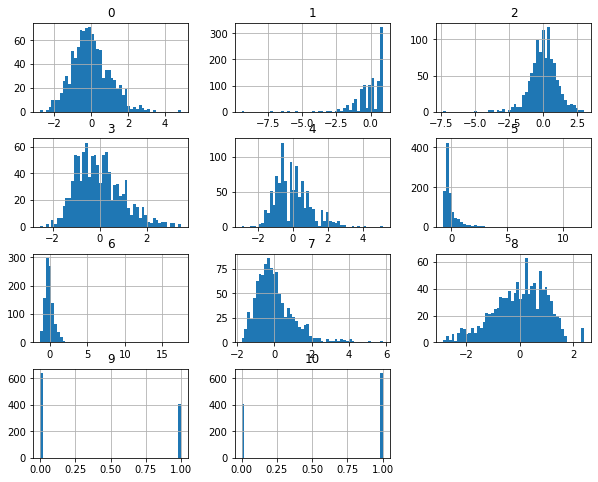

In [9]:
Total_Data_add_Gender_pd = pd.DataFrame(Total_Data_add_Gender)
Total_Data_add_Gender_pd.hist(bins = 50, figsize = (10, 8))

In [83]:
Cal_Total_Data_vital = []
Cal_Total_Data_Gender = []
Cal_Total_Data_Label = []

for i, value1 in enumerate(Cal_Full_Data):
    Cal_Total_Data_vital.append(value1[:-2])
    Cal_Total_Data_Gender.append(value1[-2])
    Cal_Total_Data_Label.append(value1[-1])

Cal_Total_Data_vital = np.array(Cal_Total_Data_vital)
Cal_Total_Data_Gender = np.array(Cal_Total_Data_Gender)
Cal_Total_Data_Label = np.array(Cal_Total_Data_Label)

print('Cal_vital : ', Cal_Total_Data_vital.shape, 'Cal_Label : ', Cal_Total_Data_Gender.shape, 'Cal_Gender : ', Cal_Total_Data_Label.shape)

Cal_vital :  (1042, 9) Cal_Label :  (1042,) Cal_Gender :  (1042,)


In [84]:
np.save('C:/jupyter/Human_Deep/Human_Deep/Data/Cal_Total_Data_Gender_Test', Cal_Total_Data_Gender)
np.save('C:/jupyter/Human_Deep/Human_Deep/Data/Cal_Total_Data_Label_Test', Cal_Total_Data_Label)

In [85]:
Cal_Total_Data_Gender

array([0., 1., 1., ..., 0., 0., 0.])

In [86]:
print('Total_Gender_Cal : ', Cal_Total_Data_Gender.shape)
print('Encodig ...')

Cal_Total_Data_Gender_reshape = np.array(Cal_Total_Data_Gender).reshape(-1, 1)
OneHote = OneHotEncoder()

OneHote.fit(Cal_Total_Data_Gender_reshape)
onehot_class_2 = OneHote.transform(Cal_Total_Data_Gender_reshape).toarray()

print('Encodig_class')
onehot_class_2

Total_Gender_Cal :  (1042,)
Encodig ...
Encodig_class


array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [87]:
value_list = []

for i, value1 in enumerate(Cal_Total_Data_vital):
    new_data = []
    for j, value2 in enumerate(value1):
        if value2 == 0:
            new_data.append(0)
        else :
            _temp_ = (value2 - Total_Data_mean[j]) / Total_Data_std[j]
            new_data.append(_temp_)
    value_list.append(new_data)

value_list = np.array(value_list)
value_list.shape

(1042, 9)

In [88]:
Cal_Total_Data_add_Gender = []

for i, value in enumerate(value_list):
    concat = []
    value1 = value
    value2 = onehot_class_2[i]
    concat = np.concatenate((value1, value2), axis = 0)
    Cal_Total_Data_add_Gender.append(concat)
    
Cal_Total_Data_add_Gender = np.array(Cal_Total_Data_add_Gender)

print('shape : ', Cal_Total_Data_add_Gender.shape)
print('Total_Data : ', Cal_Total_Data_add_Gender[0])

shape :  (1042, 11)
Total_Data :  [ 0.765507    0.252955   -0.63193885 -1.2543553   0.70166014  0.
  0.          0.         -0.48356657  1.          0.        ]


In [89]:
np.save('C:/jupyter/Human_Deep/Human_Deep/Data/Full_Data_After_Pre_Test', Total_Data_add_Gender)
np.save('C:/jupyter/Human_Deep/Human_Deep/Data/Cal_Full_Data_After_Pre_Test', Cal_Total_Data_add_Gender)